In [1]:

import sys


sys.path.append('../../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.function import SoftplusFunction
from src.NeuralNetwork import Layer, NeuralNetwork
from src.function import IdentityFunction
from matplotlib import pyplot as plt
from src.load_ds import load_matrix
from src.error import MeanAbsoluteError

from src.training.biasVariance.corssValidation_biasVariance import cross_validation_with_biasVariance, plot_training, plot_validation, plot_mean_and_std_validation

In [2]:
target_inputs, target_outputs = load_matrix('../../datasets/CUP/model_selection')

In [3]:
layer1 = Layer(num_neurons = 4, num_inputs = 9, activation_function = SoftplusFunction())
layer2 = Layer(num_neurons = 2, num_inputs = 4, activation_function = IdentityFunction())
neuralNetwork1 = NeuralNetwork([layer1, layer2], error=MeanAbsoluteError())

In [4]:
learning_rate = 0.00001
regularization_term = 0.01
momentum_term = 0.5
epochs = 100

training_error_list, validation_error_list = cross_validation_with_biasVariance(
    target_inputs = target_inputs, target_outputs = target_outputs, k = 5,
    model = neuralNetwork1, learning_rate=learning_rate, momentum_term=momentum_term,
    regularization_term=regularization_term, epochs=epochs)

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4
Process 20107 started
Process 20108 started
Process 20109 started
Process 20110 started
Process 20111 started
fatto training
fatto training
fatto training
fatto training
fatto training
Process  20107  terminated
Process  20108  terminated
Process  20109  terminated
Process  20110  terminated
Process  20111  terminated


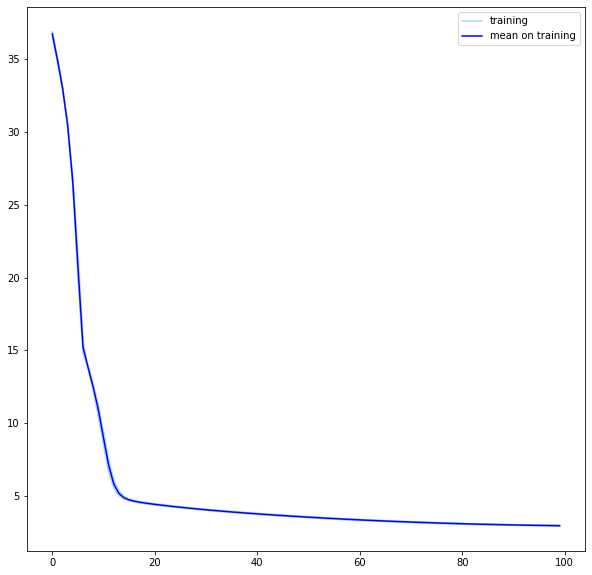

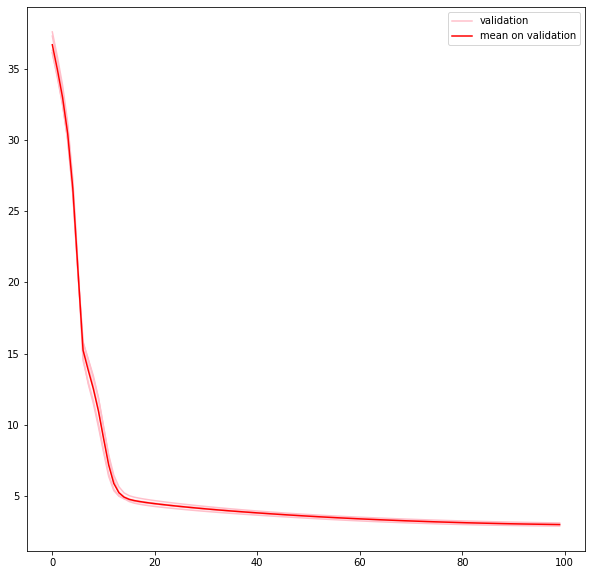

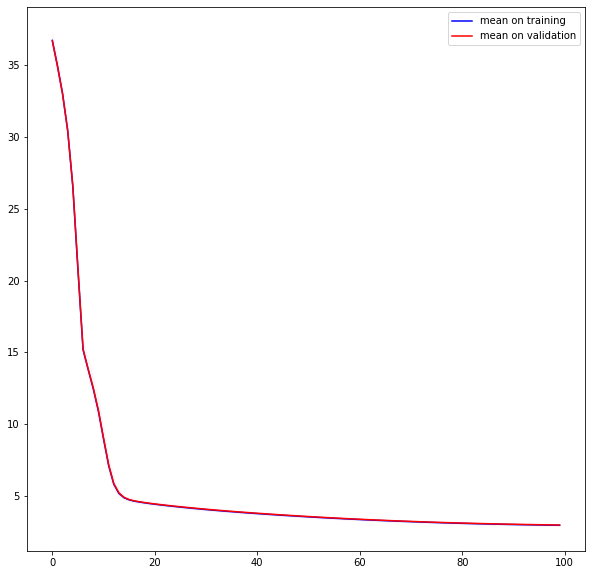

In [5]:
plt.figure(figsize=(10,10))
training_plot, mean_training_plot = plot_training(training_error_list=training_error_list)
plt.legend(handles=[training_plot, mean_training_plot])
plt.show()

plt.figure(figsize=(10,10))
validation_plot, mean_validation_plot = plot_validation(validation_error_list=validation_error_list)
plt.legend(handles=[validation_plot, mean_validation_plot])
plt.show()

plt.figure(figsize=(10,10))
plot_mean_and_std_validation(training_error_list=training_error_list,
                             validation_error_list=validation_error_list)
plt.legend()
plt.show()

In [6]:
import numpy as np
mean_validation = np.mean(validation_error_list, axis=0)
std_validation = np.std(validation_error_list, axis=0)

print("Validation: mean_validation_error \pm std_validation_error")
print(f"{mean_validation.tolist()[0][-1]} \pm {std_validation.tolist()[0][-1]}")

Validation: mean_validation_error \pm std_validation_error
2.9759139289880645 \pm 0.07499249216558783


In [1]:
import numpy as np
mean_training = np.mean(training_error_list, axis=0)
std_training = np.std(training_error_list, axis=0)

print("Training: mean_Training_error \pm std_Training_error")
print(f"{mean_training.tolist()[0][-1]} \pm {std_training.tolist()[0][-1]}")

NameError: name 'training_error_list' is not defined